In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
import matplotlib
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [2]:
from scipy import stats
from scipy.stats import mannwhitneyu
from collections import defaultdict
import re
from glob import glob
import sys
import math
from sklearn.decomposition import PCA 
matplotlib.use('Agg') 
import matplotlib as mpl 
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams["font.sans-serif"] = "Arial"
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
from scipy.stats import mannwhitneyu

In [3]:
import scanpy as sc
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

## Figure 3a The performance of the ScanTecc distinguishing different cancer stages

In [5]:
f4a=pd.read_csv("/home/luosongwen/scantecc/s4a_new.txt",sep="\t",index_col=0)
test=f4a.copy()

In [6]:
ctype_mapping = {
    '正常对照': 'Health',
    '肺癌': 'Lung',
    '卵巢癌':'Ovarian',
    '胃癌':'Gastric',
    '淋巴瘤':'Lymphoma',
    '结直肠癌':'Colorectal',
    '乳腺癌': 'Breast',
    'other':'Others'
}
test['ctype'] = test['ctype'].replace(ctype_mapping)

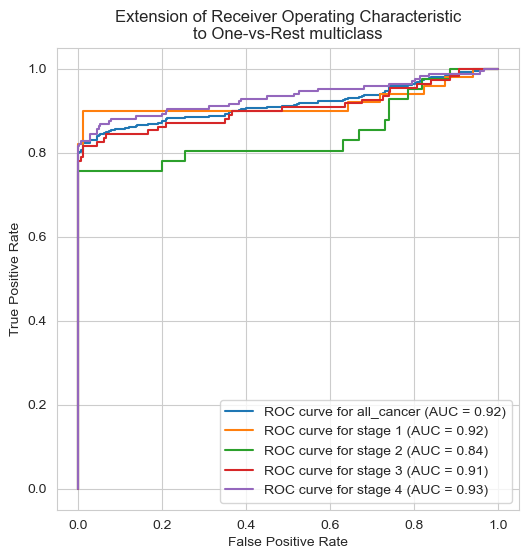

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
'''
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
'''
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#all

ta=RocCurveDisplay.from_predictions(
        test["label"].apply(lambda x:1 if x=="Disease" else -1),
        test.final_epm_without_hc,
        name=f"ROC curve for all_cancer",
        color=colors[0],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )
#1
t1=RocCurveDisplay.from_predictions(
        test[(test.state=="1") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="1") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 1",
        color=colors[1],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

#2

t2=RocCurveDisplay.from_predictions(
        test[(test.state=="2") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="2") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 2",
        color=colors[2],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )


#3

t3=RocCurveDisplay.from_predictions(
        test[(test.state=="3") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="3") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 3",
        color=colors[3],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )


#4

t4=RocCurveDisplay.from_predictions(
        test[(test.state=="4") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="4") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 4",
        color=colors[4],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )


%matplotlib inline
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
#plt.savefig("./Figures/new/fig4a.pdf",bbox_inches='tight')
plt.show()

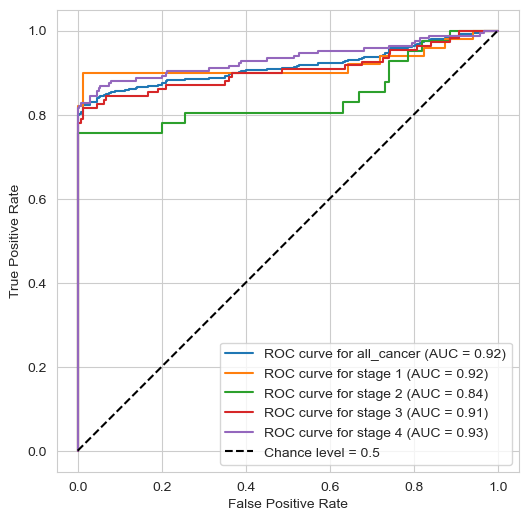

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
'''
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
'''
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#all

ta=RocCurveDisplay.from_predictions(
        test["label"].apply(lambda x:1 if x=="Disease" else -1),
        test.final_epm_without_hc,
        name=f"ROC curve for all_cancer",
        color=colors[0],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )
#1
t1=RocCurveDisplay.from_predictions(
        test[(test.state=="1") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="1") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 1",
        color=colors[1],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

#2

t2=RocCurveDisplay.from_predictions(
        test[(test.state=="2") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="2") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 2",
        color=colors[2],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )


#3

t3=RocCurveDisplay.from_predictions(
        test[(test.state=="3") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="3") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 3",
        color=colors[3],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )


#4

t4=RocCurveDisplay.from_predictions(
        test[(test.state=="4") | (test.label=="Normal")]["label"].apply(lambda x:1 if x=="Disease" else -1),
        test[(test.state=="4") | (test.label=="Normal")].final_epm_without_hc,
        name=f"ROC curve for stage 4",
        color=colors[4],
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

# 绘制 Chance Level = 0.5 的虚线
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Chance level = 0.5')

%matplotlib inline
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title("Extension of Receiver Operating Characteristic to One-vs-Rest multiclass")
plt.legend()
#plt.savefig("/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/fig3a_refined.pdf",bbox_inches='tight')
plt.show()

## Figure 3c/3d Plot representing the probability of classification as cancer with the AdaBoost/LR model for all samples.

/home/luosongwen/miniconda3/envs/scantecc/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luosongwen/miniconda3/envs/scantecc/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luosongwen/miniconda3/envs/scantecc/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luosongwen/miniconda3/envs/scantecc/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecat

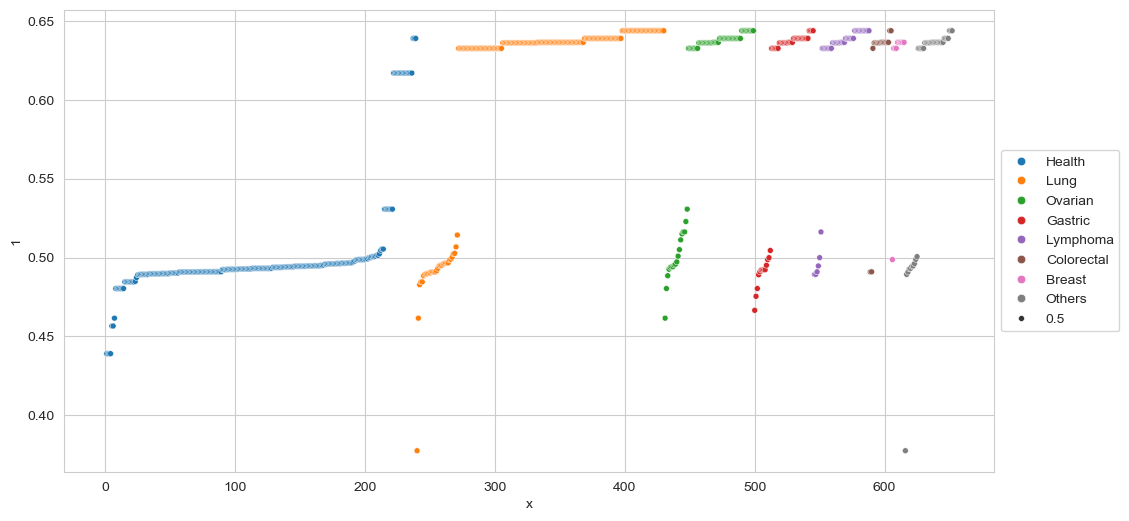

In [33]:
pr=pd.DataFrame(model_selection.cross_val_predict(AdaBoostClassifier(), test.final_epm_without_hc.values.reshape(-1, 1), 
                          test["label"].apply(lambda x:1 if x=="Disease" else -1).values, 
                          
                method='predict_proba'))

pr.index=test.index

pr["label"]=test["label"]

pr["ctype"]=test["ctype"]

t=pr.sort_values(by=["ctype",1])
t["x"]=[x for x in range(1,653)]

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})

t=pr.sort_values(by=["ctype",1],key=lambda x: x if x.name!='ctype' else x.map(np.vectorize(["Health", 'Lung', 'Ovarian', 
                                               'Gastric', 'Lymphoma', 'Colorectal', 'Breast',"Others"].index)))

t["x"]=[x for x in range(1,653)]

plt.figure(figsize = (12,6))
g=sns.scatterplot(x="x",y=1,hue="ctype",data=t,size=0.5)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.savefig("/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/fig3c_refined.pdf",bbox_inches='tight')
plt.show()

In [34]:
# 统计预测概率大于 0.625 的样本数量（按 ctype 分组）
threshold = 0.625
high_confidence_counts = t[t[1] > threshold].groupby("ctype").size()
print(high_confidence_counts)

ctype
Breast          9
Colorectal     15
Gastric        33
Health          3
Lung          159
Lymphoma       37
Others         27
Ovarian        51
dtype: int64


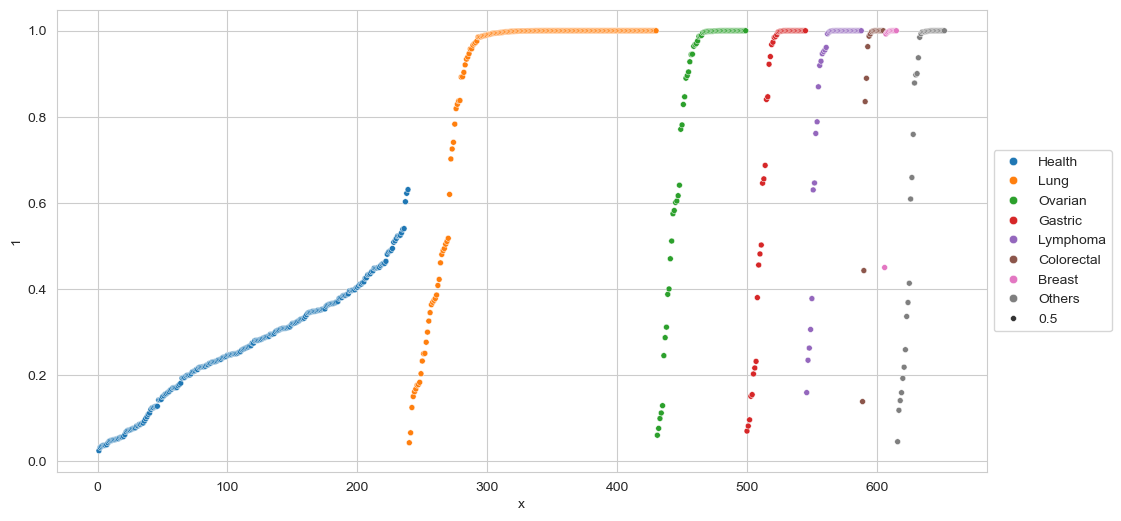

In [35]:
# 使用 Logistic Regression 进行交叉验证概率预测
pr = pd.DataFrame(
    model_selection.cross_val_predict(
        LogisticRegression(),  # 改为逻辑回归模型
        test.final_epm_without_hc.values.reshape(-1, 1),
        test["label"].apply(lambda x: 1 if x == "Disease" else -1).values,
        method='predict_proba'
    )
)

# 保留索引和标签信息
pr.index = test.index
pr["label"] = test["label"]
pr["ctype"] = test["ctype"]

# 排序和横坐标生成
t = pr.sort_values(by=["ctype", 1])
t["x"] = [x for x in range(1, 653)]

# 设置绘图参数
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid', {'font.sans-serif': ['Arial Unicode MS', 'Arial']})

# 自定义 cancer type 顺序排序
t = pr.sort_values(
    by=["ctype", 1],
    key=lambda x: x if x.name != 'ctype' else x.map(
        np.vectorize(["Health", 'Lung', 'Ovarian', 'Gastric', 'Lymphoma', 'Colorectal', 'Breast', "Others"].index)
    )
)
t["x"] = [x for x in range(1, 653)]

# 绘图
plt.figure(figsize=(12, 6))
g = sns.scatterplot(x="x", y=1, hue="ctype", data=t, size=0.5)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.savefig("/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/fig3d_refined.pdf",bbox_inches='tight')
plt.show()

In [36]:
# 统计预测概率大于 0.6 的样本数量（按 ctype 分组）
threshold = 0.6
high_confidence_counts = t[t[1] > threshold].groupby("ctype").size()
print(high_confidence_counts)

ctype
Breast          9
Colorectal     15
Gastric        34
Health          3
Lung          160
Lymphoma       38
Others         27
Ovarian        55
dtype: int64
